# Objective of the notebook
이 노트에서 sklearn의 Generalized Linear Models에 대해 sklearn의 Documentation의 설명과 예제로 알아보고<br>
Ridge regression와 Lasso regression를 우리의 데이터에 GridSearchCV를 통해 적용시켜 본다.

**About the dataset:**

이 노트에서 사용할 데이터에 대한 설명과 전처리는 아래 페이지에서 볼 수 있다.<br>
https://github.com/taejinhyun/skitlearn_study/blob/master/Seminar(181103).ipynb 

위 데이터에서 만들어진 features와 target 데이터를 csv파일로 저장하여 github에 업로드된 csv파일을 raw view로 url를 복사하여 pd.read_csv를 사용하여 읽어온다.

In [1]:
import pandas as pd
import numpy as np

In [2]:
features = pd.read_csv("https://raw.githubusercontent.com/JJongKwon/Seminar/master/features.csv")
target = pd.read_csv("https://raw.githubusercontent.com/JJongKwon/Seminar/master/target.csv", header=None)

In [3]:
features.head()

,HE_ht,HE_wt,HE_wc,HE_BMI,N_WAT_C,N_INTK,N_EN,N_WATER,N_PROT,N_FAT,...,HE_HP_2.0,HE_HP_3.0,HE_DM_1.0,HE_DM_2.0,HE_DM_3.0,HE_HCHOL_0.0,HE_HCHOL_1.0,GS_use_1.0,GS_use_2.0,GS_use_3.0
0,153.4,68.1,81.9,28.939858,3.5,1198.226616,1930.920992,761.873294,69.515824,57.722349,...,0,0,1,0,0,1,0,1,0,0
1,171.2,84.0,85.5,28.659708,4.0,2099.617699,3007.329713,1427.204406,109.849807,100.764835,...,1,0,1,0,0,1,0,1,0,0
2,160.8,52.2,71.0,20.188238,3.0,779.230888,1502.406756,443.763134,57.129583,39.501421,...,0,1,0,0,1,1,0,1,0,0
3,168.8,68.8,84.0,24.145909,5.0,1165.590400,1116.380721,911.584789,36.183575,28.630711,...,1,0,1,0,0,1,0,1,0,0
4,162.2,80.5,98.4,30.598080,15.0,2336.472416,2465.075672,1897.949605,72.131360,68.893919,...,1,0,1,0,0,1,0,1,0,0


In [4]:
features.shape

(11323, 68)

In [5]:
target.head()

,0
0,28.4
1,50.6
2,33.6
3,36.5
4,31.7


In [6]:
target.shape

(11323, 1)

In [7]:
target = np.array(target)
target = target.reshape((11323))

feature를 MinMaxScaler로 scaling한다.

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(features)
features = scaler.transform(features)

모델을 훈련하고 성능을 평가하기 위해 train과 test 데이터로 split한다.

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=0)

In [11]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8492, 68) (2831, 68) (8492,) (2831,)


## 1. Generalized Linear Models
https://github.com/JJongKwon/Seminar/blob/master/sklearn(Regression%2C%20Classification).ipynb

|**Model**|**Module**|**Explain**|
|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------:|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------:|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------:|
|**1. [Generalized Linear Models](http://scikit-learn.org/stable/modules/linear_model.html)**|
|[Stochastic Gradient Descent(SGD)](https://scikit-learn.org/stable/modules/linear_model.html#stochastic-gradient-descent-sgd)|[linear_model.SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn-linear-model-sgdregressor)|Linear model fitted by minimizing a regularized empirical loss with SGD|
|                                                         [Ridge](http://scikit-learn.org/stable/modules/linear_model.html#ridge-regression)                                                         |                                  [linear_model.Ridge](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge)                                  |                                                                 Linear least squares with l2 regularization.                                                                 |
|     .|                               [linear_model.RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn.linear_model.RidgeCV)                               |                                                               Ridge regression with built-in cross-validation.|
|                                                                                                                                                                                 .                   |                  [linear_model.ridge_regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ridge_regression.html#sklearn.linear_model.ridge_regression)                 |                                                          Solve the ridge equation by the method of normal equations.                                                         |
|                                                               [Lasso](http://scikit-learn.org/stable/modules/linear_model.html#lasso)                                                              |                                  [linear_model.Lasso](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso)                                  |                                                       Linear Model trained with L1 prior as regularizer (aka the Lasso)                                                      |
|                                                                                                                                                                            .                        |                               [linear_model.LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html#sklearn.linear_model.LassoCV)                               |                                                     Lasso linear model with iterative fitting along a regularization path                                                    |

Generalized Linear Model은 목표값(target)이 입력 변수(feature)의 선형 결합(linear combination)으로 예상되는 회귀 분석을 위한 모델이다.

모듈 전체에서 벡터 $w = (w_1, ..., w_p)$는 `coef_`가, $w_0$는 `intercept_`이 가리킨다.

### 1.1 Stochastic Gradient Descent(SGD)
https://scikit-learn.org/stable/modules/linear_model.html#stochastic-gradient-descent-sgd

Stochastic Gradient Descent(SGD)는 선형 모형을 적합시키기 위한 간단하지만 매우 효율적인 접근법이다.

특히 sample(feature)의 수가 매우 클 때 유용하다.

SGDClassifier와 SGDRegressor는 서로 다른(convex) loss function와 패널티를 사용하여 분류와 회귀를 위한 선형 모델에 적합한 기능을 제공한다.<br>
[Convex function](http://sanghyukchun.github.io/63/)

- SGDClassifier는 로지스틱 회귀 모형을 적합(loss="log") 
- SGDRegressor는 Linear SVM에 적합(loss="inge")

### References
SGD는 기계학습 커뮤니티에서 오랫동안 존재해왔지만, 최근 대규모 학습이라는 맥락에서 상당한 관심을 받아왔다.

SGD는 텍스트 분류와 자연어 처리에서 자주 발생하는 큰 규모와 sparse한 기계 학습 문제에 성공적으로 적용되었다.<br>
데이터가 sparse한 경우,$10^5$개 이상의 훈련 example와 $10^5$개 이상의 feature로 쉽게 문제를 해결할 수 있다.

**이점**
- 효율성
- 쉬운 구현(많은 코드 튜닝의 기회)

**단점**
- 규제화 파라미터와 반복수와 같은 하이퍼파라미터의 수 필요
- feature scaling에 민감.

### 1.1.2 SGD Regression
SGDRegressor는 다양한 손실 함수와 패널티를 지원하는 선형 회귀 모델에 적합한 plain stochastic gradient descent learning routine을 구현한다. SGDRegressor는 많은 훈련 샘플(10.000보다 큰)의 회귀 문제에 적합하며, 다른 문제에는 Ridge, Lasso 또는 ElasticNet을 권장한다.

구체적인 손실 함수는 `loss` 매개 변수를 통해 설정할 수 있다.
- `loss="squared_loss"`: Ordinary least squares,
- `loss="huber"`: Huber loss for robust regression,
- `loss="epsilon_insensitive"`: linear Support Vector Regression.<br>
*Huber 및 epsilon-insensitive(엡실론에 민감하지 않은) 손실 함수는 robust 회귀에 사용될 수 있다.<br> 
민감하지 않은 영역의 너비는 매개 변수 `epsilon`을 통해 지정해야한다.<br>
이 매개 변수는 target 변수의 scale에 따라 다릅니다.*

SGDRegressor supports averaged SGD as SGDClassifier. Averaging can be enabled by setting `average=True`.
SGDRegressor는 평균 SGD를 SGDClassifier로 지원합니다. 평균은`average = True`로 설정하면 가능합니다.

For regression with a squared loss and a l2 penalty, another variant of SGD with an averaging strategy is available with Stochastic Average Gradient (SAG) algorithm, available as a solver in Ridge.
제곱 손실 및 12 페널티가있는 회귀 분석의 경우 평균화 전략을 사용하는 SGD의 다른 변형을 확률 평균 평균 그래디언트 (SIC : Stochastic Average Gradient) 알고리즘과 함께 사용할 수 있으며 릿지의 솔버로 사용할 수 있습니다.

#### sklearn.linear_model.SGDRegressor
SGD로 규제화된 경험적 손실을 최소화하여 적합된 선형 모델

SGD stands for Stochastic Gradient Descent: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate).
SGD는 loss의 gradient는 한 번에 각 sample에 대해 추정되며, 모델은 감소하는 학습 속도에 따라 업데이트된다.

The regularizer is a penalty added to the loss function that shrinks model parameters towards the zero vector using either the squared euclidean norm L2 or the absolute norm L1 or a combination of both (Elastic Net). If the parameter update crosses the 0.0 value because of the regularizer, the update is truncated to 0.0 to allow for learning sparse models and achieve online feature selection.
규제화(정규화)란 유클리드 표준 L2 또는 절대 표준 L1 또는 두 가지 모두의 조합(탄성 네트)을 사용하여 제로 벡터에 대한 모델 매개변수를 축소하는 손실 기능에 추가된 페널티다. 정규화기로 인해 파라미터 업데이트가 0.0 값을 초과하면 스파스 모델을 학습하고 온라인 기능 선택을 달성할 수 있도록 업데이트가 0.0으로 잘린다.

This implementation works with data represented as dense numpy arrays of floating point values for the features.
이 구현은 형상에 대한 부동 소수점 값의 조밀한 numpy 배열로 표현되는 데이터를 사용하여 작동한다.

The partial_fit method allows online/out-of-core learning.

```python
class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
```

`fit_intercept` *(defalut: True)*
- True : 절편이 있는 모형
-  False : 절편이 없는 모형

`normalize` : 설명변수의 표준화 여부 *(defalut: False)*

`copy_X` : 표준화를 했을 경우 덮어쓰기 여부 *(defalut: True)*
- True : 덮어쓰지 않고 새로 만든다.
- False : 덮어쓴다.

`n_jobs` : 작업간 사용할 CPU 코어 개수 지정 *(defalut: None)*
- n_jobs=-1 : 모든 코어 사용을 지정

In [11]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [38]:
reg.score(X_test, y_test)

0.6393769511624625

In [14]:
reg.coef_

array([[ 3.51344228e-01,  4.77855206e-01, -1.05509997e-01,
        -6.33626834e-01, -1.21217640e-02, -6.24698731e-03,
         2.11350028e-03,  6.14890574e-03, -3.43202234e-04,
         1.97971361e-02, -3.82218499e-02, -4.60348834e-02,
        -4.83999227e-02, -6.46821052e-02,  5.63145327e-03,
        -4.60269423e-04,  2.34479409e-04,  3.22162181e-03,
         3.14758123e-04,  9.22242923e-05,  1.32112932e-02,
         8.49645952e-05, -6.27640770e-05, -1.45848154e-03,
         2.53459599e-04,  1.45701148e-03,  4.58938703e-01,
        -4.40689233e-02,  4.50844820e-03, -1.85691666e-03,
        -4.52403998e-01,  1.91446781e-01,  2.38793071e-01,
         2.21641463e-02, -4.01899626e-01, -1.92035184e-01,
         3.59650424e-01,  2.34284385e-01, -6.49236190e-01,
        -6.39700311e-01, -6.07407896e-01,  1.20446189e+00,
         3.06890870e+00, -2.31281227e-01, -2.14574496e+00,
         7.64184723e-01, -7.64184723e-01, -1.47666724e+00,
         1.47666724e+00, -3.07064248e-01,  3.07064248e-0

In [15]:
reg.intercept_ 

array([-31.2201846])

### 1.2. [Ridge Regression](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression)

$$\min_{w} {{|| X w - y||_2}^2 + \alpha {||w||_2}^2}$$

**Ridge regression**는 계수의 크기(parameter)에 페널티를 부과함으로써 최소 제곱의 계수의 크기가 커지는것을 해결한다(계수가 커지면 일반화 능력이 떨어지기 때문). 

페널티가 있는 잔차 제곱합을 최소화한다. 여기에서 $\alpha \geq 0$은 shrinkage(수축)을 제어하는 복잡도 매개 변수다.

```python
class sklearn.linear_model.Ridge(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver=’auto’, random_state=None)
```
`fit_intercept` , `normalize` , `copy_X` , `n_jobs`, `random_state`

`alpha` : Regularization strength(규제 강도)<br>
값이 클수록 더 강한 규제가 지정된다.<br>

`max_iter` : int, optional<br>
Maximum number of iterations for conjugate gradient solver. 

`tol` : float<br>
Precision of the solution.

`solver` : {'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'}<br>
Solver to use in the computational routines
- auto : 데이터 유형에 따라 자동으로 solver를 선택
- svd : X의 Singular Value Decomposition(특이값분해)를 통해 릿지 계수를 계산한다.
- cholesky : uses the standard scipy.linalg.solve function to obtain a closed-form solution.
- sparse_cg : uses the conjugate gradient solver as found in scipy.sparse.linalg.cg. 
- lsqr : uses the dedicated regularized least-squares routine scipy.sparse.linalg.lsqr. It is the fastest and uses an iterative procedure.
- sag : uses a Stochastic Average Gradient descent, and 'saga' uses its improved

In [40]:
from sklearn.linear_model import Ridge
np.random.seed(20181201)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train) 

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [41]:
ridge.score(X_test, y_test)

0.6393794649368093

In [1]:
# Author: Fabian Pedregosa -- <fabian.pedregosa@inria.fr>
# License: BSD 3 clause

print(__doc__)

Automatically created module for IPython interactive environment


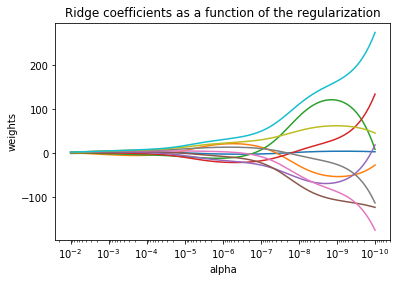

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

# X is the 10x10 Hilbert matrix
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

# #############################################################################
# Compute paths

n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

# #############################################################################
# Display results

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

추정량의 계수에 공선성의 영향을 표시한다.<br>
각 색상은 계수 벡터의 다른 특징을 나타내며, 이는 규제화 매개 변수의 함수로 표시된다.

이 예제는 또한 ill-conditioning 행렬에 릿지 회귀를 적용하는 것이 유용함을 보여줍니다.<br> 
이러한 행렬의 경우 target 변수가 약간 변경되면 계산된 가중치가 크게 달라질 수 있습니다.<br> 
그러한 경우, 이 변동(노이즈)을 줄이기 위해 특정 규제화($\alpha$)를 설정하는 것이 유용합니다.<br>

$\alpha$가 매우 큰 경우 규제 효과가 제곱된 손실 함수를 지배하고 계수는 0이 됩니다.<br>
경로의 끝에서 알파는 0으로 향하고 solution은 일반적인 최소 제곱으로 향하기 때문에 계수는 큰 진동을 나타냅니다.<br>
실제로는 둘 사이의 균형이 유지되는 방식으로 $\alpha$를 조정해야합니다.<br>

ill-conditioning에 대한 설명 : http://www.cs.uleth.ca/~holzmann/notes/illconditioned.pdf

```python
class sklearn.linear_model.RidgeCV(alphas=(0.1, 1.0, 10.0), fit_intercept=True, normalize=False, scoring=None, cv=None, gcv_mode=None, store_cv_values=False)
```

릿지 회귀에 내장된 교차 검증을 사용 *default : Leave-One-Out 교차 검증*

In [26]:
from sklearn.linear_model import RidgeCV
ridgecv = linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0], cv=3)
ridgecv.fit(X_train, y_train)
ridgecv.score(X_test, y_test) 

0.6393988535294106

```python
sklearn.linear_model.ridge_regression(X, y, alpha, sample_weight=None, solver=’auto’, max_iter=None, tol=0.001, verbose=0, random_state=None, return_n_iter=False, return_intercept=False)
```

Normal Equations 방법으로 Ridge Equation를 푼다.

Normal Equations에 대해서는 아래에 정리되어있다.<br>
https://github.com/JJongKwon/Study/blob/master/Chapter7%20Linear%20Regression(Normal%20equation).ipynb

### 1.3. [Lasso Regression](https://scikit-learn.org/stable/modules/linear_model.html#lasso)

Lasso는 희소(sparse) 계수를 추정하는 선형 모델이다.<br>
매개 변수 값이 적은 solution을 선호하여 주어진 solution이 종속되는 변수의 수를 효과적으로 줄이는 경향 때문에 일부 상황에서 유용하다. <br>
이러한 이유로 Lasso와 그 변형은 압축 감지 분야의 기본이다. (압축 감지 : Lasso가 있는 [단층 촬영 재구성 참조](https://scikit-learn.org/stable/auto_examples/applications/plot_tomography_l1_reconstruction.html#sphx-glr-auto-examples-applications-plot-tomography-l1-reconstruction-py))

최소화할 목적 함수는 다음과 같다.

$$\min_{w} { \frac{1}{2n_{samples}} ||X w - y||_2 ^ 2 + \alpha ||w||_1}$$

따라서 Lasso 추정은 $\alpha ||w||_1$ 패널티를 가진 최소제곱을 최소화한다. 
이때, $\alpha$는 상수이고 $||w||_1$는 파라미터의 벡터의 $l1$-norm이다.

$\alpha$ 매개 변수는 추정된 계수의 희소성 정도를 제어한다.

```python
class sklearn.linear_model.Lasso(alpha=1.0, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection=’cyclic’)
```

`fit_intercept`, `normalize`, `tol`, `copy_X`, `random_state`

`alpha` : L1항에 곱하는 상수. *default = 1.0*<br>
alpha = 0는 LinearRegression과 동일합니다. (수치적인 이유로, alpha = 0을 사용하는 것은 권장되지 않는다.)

`max_iter` : 최대 반복 수

`positive` : True일 때, 계수가 정수가 되도록 한다.

`precompute` : True | False | array-like, default=False<br>
계산 속도를 높이기 위해 사전 계산 된 Gram matrix를 사용할지 여부.<br>
'auto'로 설정하면 Gram matrix가 인자로 전달될 수 있다.

`selection` : str, default 'cyclic'<br>
If set to 'random', a random coefficient is updated every iteration rather than looping over features sequentially by default.<br>
This (setting to 'random') often leads to **significantly faster convergence** especially when tol is higher than 1e-4.

Gram matrix에 대한 설명 : https://en.wikipedia.org/wiki/Gramian_matrix

In [6]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1, max_iter=30000)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=30000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [7]:
lasso.score(X_test, y_test)

0.6323860284020162

```python
class sklearn.linear_model.LassoCV(eps=0.001, n_alphas=100, alphas=None, fit_intercept=True, normalize=False, precompute=’auto’, max_iter=1000, tol=0.0001, copy_X=True, cv=’warn’, verbose=False, n_jobs=None, positive=False, random_state=None, selection=’cyclic’)
```

규제화 경로를 따라 fitting을 반복하는 Lasso 선형 모델입니다.

`fit_intercept`, `normalize`, `precompute`, `max_iter`, `tol`, `copy_X`, `verbose`, `n_jobs`, `positive`, `random_state`, `selection`

`eps` : 경로의 길이.<br>
eps=1e-3 => alpha_min / alpha_max = 1e-3.

`n_alphas` : 규제화 경로 사이의 $\alpha$의 수

`alphas` : 모델을 계산할 $\alpha$의 list<br>
If None alphas are set automatically

`cv` : int, cross-validation generator or an iterable, optional<br>
None, to use the default 3-fold cross-validation,

In [20]:
from sklearn.linear_model import LassoCV
lassoCV = LassoCV()
lassoCV.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [21]:
lassoCV.score(X_test, y_test)

0.5862991776069626

## GridSearch

지난 세미나때 이용한 Ensemble 방법과 Ridge, Lasso를 pipline을 사용하여 GridSearch를 해보고자 한다.

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
import numpy as np

먼저 ridge와 lasso의 매개변수들에 대해 gridsearch를 수행하여 best_estimator를 찾고자한다.

In [42]:
# Create a pipeline
pipe = Pipeline([('regressor', Ridge())])


search_space = [{'regressor': [Ridge()],
                 'regressor__alpha':[10**i for i in [2, 1, 0, -1, -2]]},
                {'regressor': [Lasso()],
                 'regressor__alpha':[10**i for i in [2, 1, 0, -1, -2]],
                 'regressor__max_iter': [50000]}]

In [44]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)
regCV = GridSearchCV(pipe, search_space, cv=kfold)

In [ ]:
regCV.fit(X_train,y_train)

In [ ]:
regCV.score(X_test,y_test)

In [ ]:
regCV.best_estimator_

In [37]:
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor

위에서 찾은 best_estimator를 ensemble 모델의 base_estimator로 전달하고 다른 매개변수들을 gridsearch 한다. 

In [ ]:
# Create a pipeline
pipe = Pipeline([('regressor', AdaBoostRegressor())])

ensemble_search = [{'regressor': [AdaBoostRegressor(regCV.best_estimator_)],
                 'regressor__n_estimators': [5, 10, 30],
                 'regressor__learning_rate': [0.1, 0.01, 0.001],
                'regressor_loss': ['linear', 'square', 'exponential']},
               {'regressor': [BaggingRegressor(regCV.best_estimator_)],
                 'regressor__n_estimators': [5, 10, 30],
                 'regressor__max_features': [0.1, 0.5, 1.0],
                 'regressor__max_samples': [0.1, 0.5, 1]}]

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kf = KFold(n_splits=5)

In [ ]:
ensembleCV = GridSearchCV(pipe, ensemble_search, cv=kf)

In [ ]:
ensembleCV.fit(X_train,y_train)

In [ ]:
ensembleCV.score(X_test,y_test)

In [ ]:
ensembleCV.best_estimator_